<a href="https://colab.research.google.com/github/wal-03/CapStone-Project-1-Data-Mining/blob/main/CapStone_1_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Some Python Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings; warnings.simplefilter('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

!pip install kmodes
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle

from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

In [ ]:
# Loading Data:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/wal-03/CapStone-Project-1-Data-Mining/refs/heads/main/alumni_preprocessed.csv

mkdir: cannot create directory ‘data’: File exists
--2024-10-26 09:10:23--  https://raw.githubusercontent.com/wal-03/CapStone-Project-1-Data-Mining/refs/heads/main/alumni_preprocessed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87258 (85K) [text/plain]
Saving to: ‘data/alumni_preprocessed.csv.1’

alumni_preprocessed 100%[===================>]  85.21K  --.-KB/s    in 0.02s   

2024-10-26 09:10:23 (3.72 MB/s) - ‘data/alumni_preprocessed.csv.1’ saved [87258/87258]



In [ ]:
df = pd.read_csv("data/alumni_preprocessed.csv", low_memory = False, encoding='utf8')
df

,Timestamp,Program Studi,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Status saat ini,Waktu Mendapatkan Pekerjaan,Perusahaan,Posisi,Tahun Wirausaha,Bidang wirausaha,Penghasilan,Tahun Masuk S2,Universitas S2,Tahun Masuk S3,Universitas S3,Nama Prodi S2/S3,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran
0,6/4/2024 11:27,Prodi Agribisnis S1,2018,2024,Mei,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN
1,6/4/2024 11:28,Prodi Agribisnis S1,2018,2024,Mei,Karyawan Swasta,6.0,AHHA Korpora Indonesia,Host Live,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,NaN
2,6/4/2024 11:28,Prodi Agribisnis S1,2017,2024,Mei,Melamar Pekerjaan,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN
3,6/4/2024 11:29,Prodi Agribisnis S1,2019,2024,Mei,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN
4,6/4/2024 11:30,Prodi Agribisnis S1,2018,2024,Mei,Pengajar,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,9/11/2024 13:28,Prodi Teknik Pertambangan,2020,2024,November,Karyawan Swasta,1.0,Perhimpunan Ahli Pertambangan Indonesia,Copywriter ESG Nikel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5,"Adanya program job fair untuk para alumni, yan..."
429,9/18/2024 15:07,Prodi Agribisnis S1,2019,2024,November,Karyawan Swasta,1.0,PT. Satwa Medika Utama,Staff Admin,NaN,NaN,3500000.0,NaN,NaN,NaN,NaN,NaN,4,5,Alhamdulillah semua berjalan dengan baik. Semo...
430,10/14/2024 14:49,Prodi Agribisnis S1,2020,2024,November,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,saran untuk prodi membuat jadwal seminar supay...
431,10/15/2024 14:43,Prodi Agribisnis S1,2020,2024,November,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN


In [ ]:
#melakukan perubahan tipe data
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Program Studi'] = df['Program Studi'].astype('category')
df['Tahun Masuk UIN Jakarta'] = df['Tahun Masuk UIN Jakarta'].astype('Int64')
df['Tahun Wisuda'] = df['Tahun Wisuda'].astype('Int64')
df['Bulan Wisuda'] = df['Bulan Wisuda'].astype('category')
df['Status saat ini'] = df['Status saat ini'].astype('category')
df['Waktu Mendapatkan Pekerjaan'] = df['Waktu Mendapatkan Pekerjaan'].astype('Int64')
df['Tahun Wirausaha'] = df['Tahun Wirausaha'].astype('Int64')
df['Penghasilan'] = df['Penghasilan'].astype('Int64')
df['Tahun Masuk S2'] = df['Tahun Masuk S2'].astype('Int64')
df['Universitas S2'] = df['Universitas S2'].astype("category")
df['Tahun Masuk S3'] = df['Tahun Masuk S3'].astype('Int64')
df['Universitas S3'] = df['Universitas S3'].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Timestamp                    433 non-null    datetime64[ns]
 1   Program Studi                433 non-null    category      
 2   Tahun Masuk UIN Jakarta      433 non-null    Int64         
 3   Tahun Wisuda                 433 non-null    Int64         
 4   Bulan Wisuda                 433 non-null    category      
 5   Status saat ini              421 non-null    category      
 6   Waktu Mendapatkan Pekerjaan  273 non-null    Int64         
 7   Perusahaan                   221 non-null    object        
 8   Posisi                       224 non-null    object        
 9   Tahun Wirausaha              30 non-null     Int64         
 10  Bidang wirausaha             32 non-null     object        
 11  Penghasilan                  204 non-null    

In [ ]:
# memeriksa entri data di tiap variabel, apakah ada noise
def cekdf(df):
  list_kolom = list(df.columns)
  for i in list_kolom:
    print("\n",i)
    print(df[i].unique())

cekdf(df)


 Timestamp
<DatetimeArray>
['2024-06-04 11:27:00', '2024-06-04 11:28:00', '2024-06-04 11:29:00',
 '2024-06-04 11:30:00', '2024-06-04 11:34:00', '2024-06-04 12:04:00',
 '2024-06-04 12:07:00', '2024-06-05 15:37:00', '2024-06-06 08:37:00',
 '2024-06-25 10:49:00',
 ...
 '2024-08-28 12:48:00', '2024-08-28 14:16:00', '2024-08-28 14:34:00',
 '2024-09-06 08:22:00', '2024-09-08 21:40:00', '2024-09-11 13:28:00',
 '2024-09-18 15:07:00', '2024-10-14 14:49:00', '2024-10-15 14:43:00',
 '2024-10-18 12:32:00']
Length: 402, dtype: datetime64[ns]

 Program Studi
['Prodi Agribisnis S1', 'Prodi Kimia', 'Prodi Matematika', 'Prodi Agribisnis S2', 'Prodi Biologi', 'Prodi Fisika', 'Prodi Teknik Informatika', 'Prodi Teknik Pertambangan']
Categories (8, object): ['Prodi Agribisnis S1', 'Prodi Agribisnis S2', 'Prodi Biologi', 'Prodi Fisika',
                         'Prodi Kimia', 'Prodi Matematika', 'Prodi Teknik Informatika',
                         'Prodi Teknik Pertambangan']

 Tahun Masuk UIN Jakarta
<Int

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Timestamp                    433 non-null    datetime64[ns]
 1   Program Studi                433 non-null    category      
 2   Tahun Masuk UIN Jakarta      433 non-null    Int64         
 3   Tahun Wisuda                 433 non-null    Int64         
 4   Bulan Wisuda                 433 non-null    category      
 5   Status saat ini              421 non-null    category      
 6   Waktu Mendapatkan Pekerjaan  273 non-null    Int64         
 7   Perusahaan                   221 non-null    object        
 8   Posisi                       224 non-null    object        
 9   Tahun Wirausaha              30 non-null     Int64         
 10  Bidang wirausaha             32 non-null     object        
 11  Penghasilan                  204 non-null    

<Figure size 640x480 with 0 Axes>

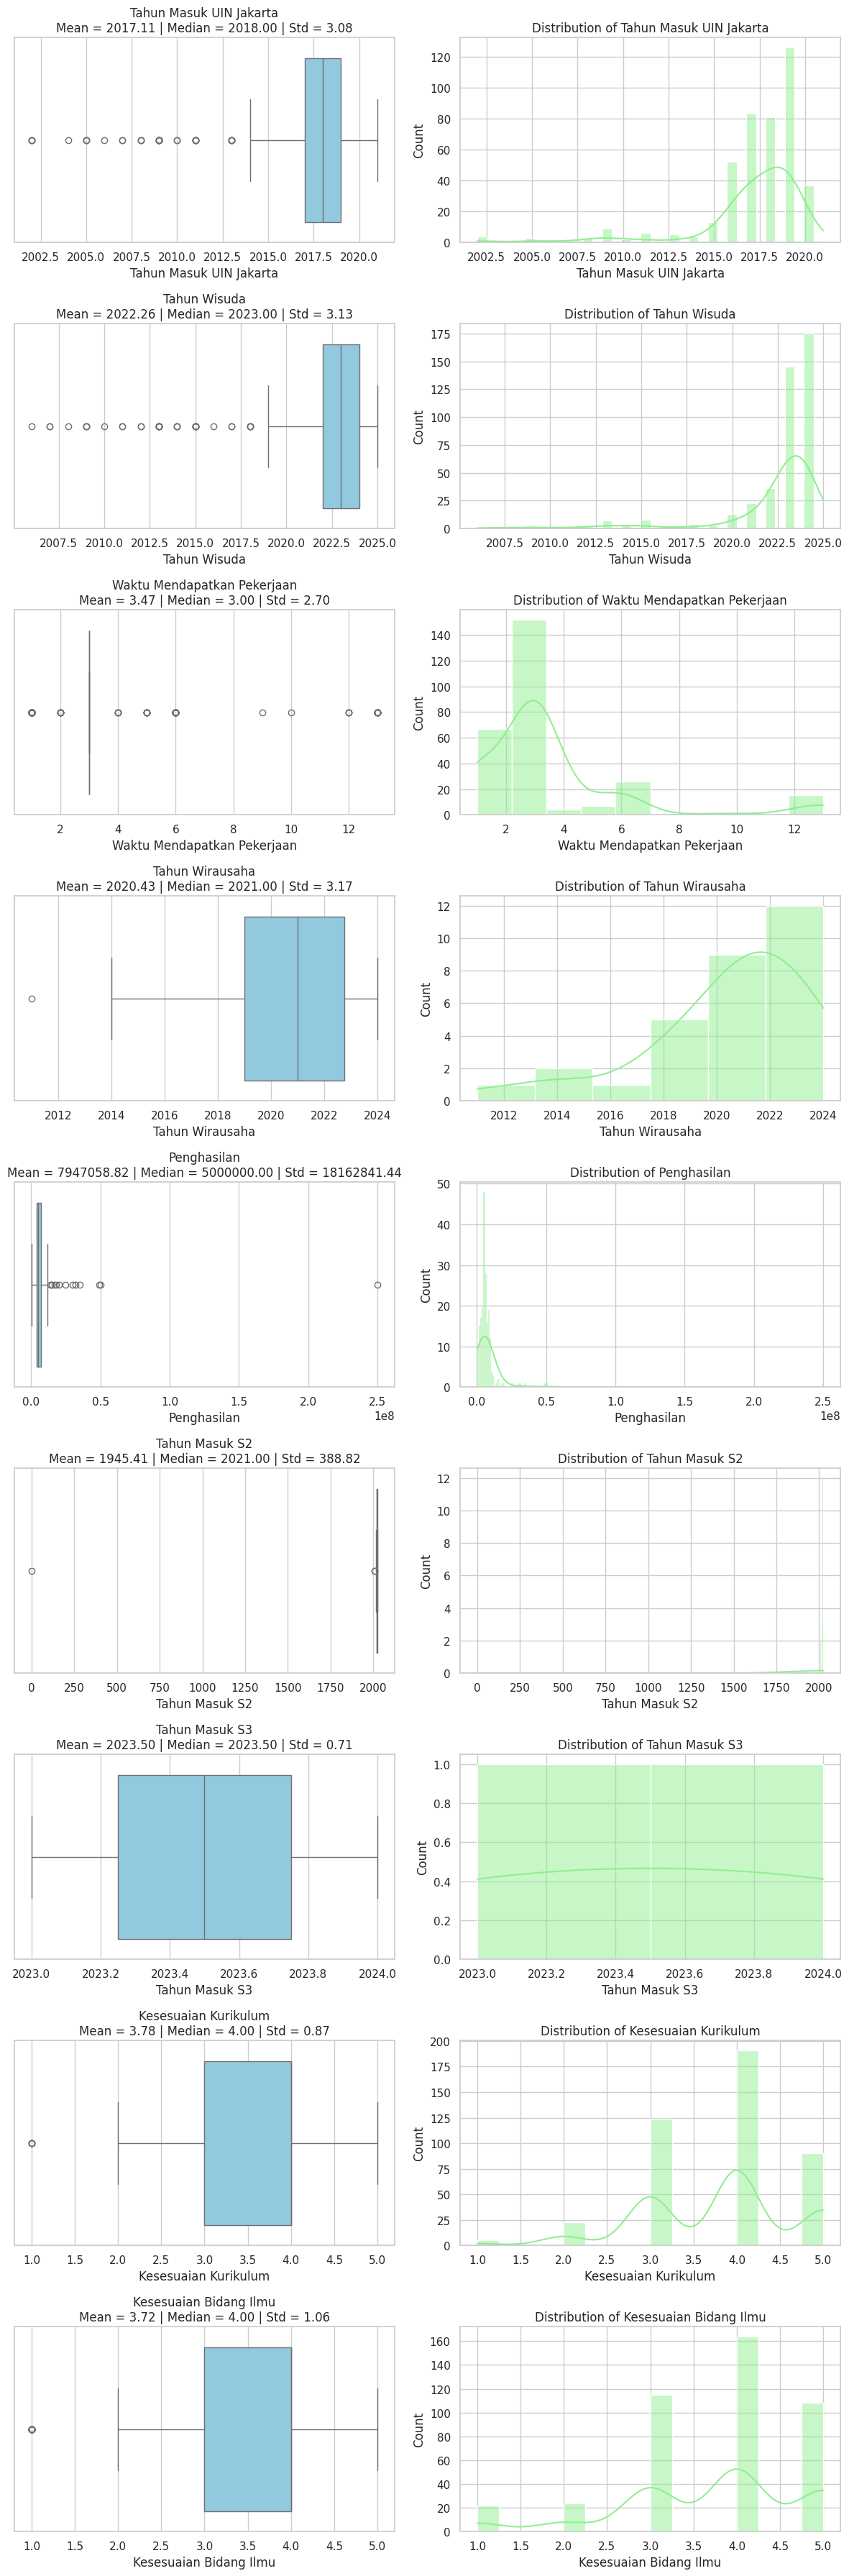

In [ ]:
numerik = ['Tahun Masuk UIN Jakarta', 'Tahun Wisuda', 'Waktu Mendapatkan Pekerjaan', 'Tahun Wirausaha', 'Penghasilan', 'Tahun Masuk S2', 'Tahun Masuk S3', 'Kesesuaian Kurikulum', 'Kesesuaian Bidang Ilmu']

sns.set(style='whitegrid')  # Use whitegrid for better grid visibility in the plots
plt.clf()

# Function to create plots
def plot_num(features):
    n_features = len(features)
    fig, axs = plt.subplots(n_features, 2, figsize=(12, 4 * n_features))

    for i, kol in enumerate(features):
        # Boxplot
        sns.boxplot(x=df[kol], ax=axs[i][0], color='skyblue')
        axs[i][0].set_title(f'{kol}\nMean = {df[kol].mean():.2f} | Median = {df[kol].median():.2f} | Std = {df[kol].std():.2f}')

        # Histogram with KDE
        sns.histplot(df[kol], kde=True, ax=axs[i][1], color='lightgreen')
        axs[i][1].set_title(f'Distribution of {kol}')

    plt.tight_layout()
    plt.show()

# Call the function to create plots for numeric data
plot_num(numerik)


<Figure size 640x480 with 0 Axes>

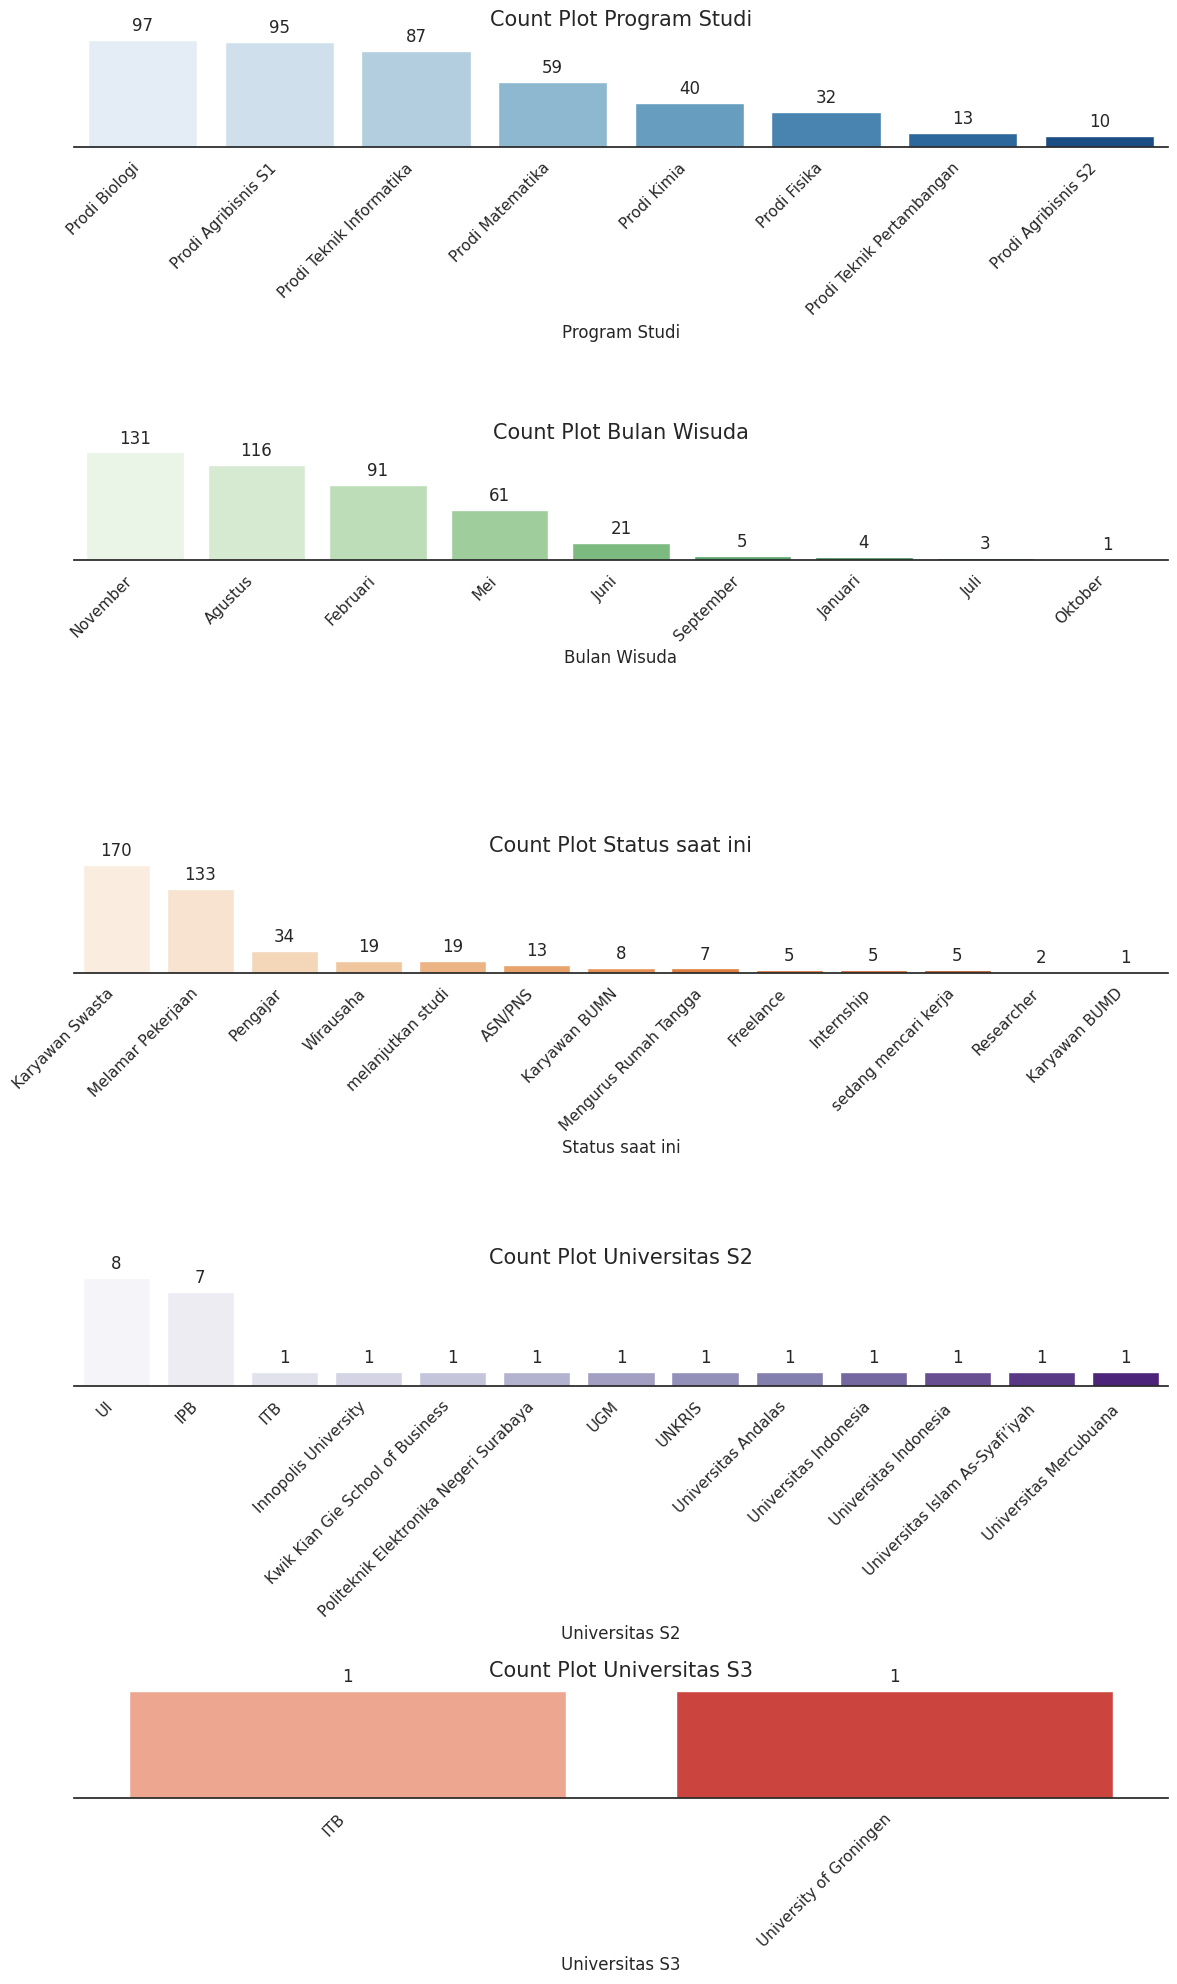

In [ ]:
# List of categorical columns
kategorik = ['Program Studi', 'Bulan Wisuda', 'Status saat ini', 'Universitas S2', 'Universitas S3']

# Set seaborn style
sns.set(style='white')
plt.clf()

# List of color palettes (extendable)
palettes = ['Blues', 'Greens', 'Oranges', 'Purples', 'Reds', 'coolwarm']

# Adjusting the number of subplots based on the number of categorical features
n_features = len(kategorik)
fig, axs = plt.subplots(n_features, 1, figsize=(12, 4 * n_features))

# Create count plots for each categorical column
for i, kol2 in enumerate(kategorik):
    # Ensure column exists and is not empty
    if df[kol2].notna().sum() > 0:  # Check for non-null values
        # Cycle through the palettes to avoid running out
        palette = palettes[i % len(palettes)]

        # Generate the count plot with a different color palette
        sns.countplot(x=df[kol2].dropna(), order=df[kol2].value_counts().index, ax=axs[i], palette=palette)
        axs[i].set_title(f'Count Plot {kol2}', fontsize=15)

        # Rotate the x-axis labels if necessary
        plt.setp(axs[i].get_xticklabels(), rotation=45, ha='right')  # Correct method to rotate and align labels

        # Annotate the bar heights
        for p in axs[i].patches:
            axs[i].annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 10),
                            textcoords='offset points')

        # Hide the right, top, and left spines
        sns.despine(right=True, top=True, left=True)

        # If desired, hide the y-axis values or keep them visible
        axs[i].axes.yaxis.set_visible(False)
    else:
        # If column has no valid data, show a warning title
        axs[i].set_title(f'No valid data for {kol2}', fontsize=15)

plt.tight_layout()

# Show the plot
plt.show()


# Persiapan Data Model

## Standarisasi Kolom Numerik

In [ ]:
# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[numerik ].describe().round(1))

# Standarisasi
df_std = StandardScaler().fit_transform(df[numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[numerik].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(df_std.describe().round(0))

Statistik sebelum Standarisasi

       Tahun Masuk UIN Jakarta  Tahun Wisuda  Waktu Mendapatkan Pekerjaan  \
count                    433.0         433.0                        273.0   
mean                    2017.1        2022.3                          3.5   
std                        3.1           3.1                          2.7   
min                     2002.0        2006.0                          1.0   
25%                     2017.0        2022.0                          3.0   
50%                     2018.0        2023.0                          3.0   
75%                     2019.0        2024.0                          3.0   
max                     2021.0        2025.0                         13.0   

       Tahun Wirausaha  Penghasilan  Tahun Masuk S2  Tahun Masuk S3  \
count             30.0        204.0            27.0             2.0   
mean            2020.4    7947058.8          1945.4          2023.5   
std                3.2   18162841.4           388.8          

## Konversi Kategorik Data Dengan Label Encoder

In [ ]:
# Membuat salinan data frame
df_encode = df[kategorik].copy()

# Melakukan labelEncoder untuk semua kolom kategorik
for col in kategorik:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.sample(10))

     Program Studi  Bulan Wisuda  Status saat ini  Universitas S2  \
44               5             6                5              13   
372              0             6                6              13   
192              6             6                5              13   
406              0             0                6              13   
126              6             0                5              13   
320              2             0                8              13   
18               4             6                4              13   
395              0             6                6              13   
65               5             6                5              13   
41               5             1                5              13   

     Universitas S3  
44                2  
372               2  
192               2  
406               2  
126               2  
320               2  
18                2  
395               2  
65                2  
41                2 

## Menggabungkan Dataframe

In [ ]:
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_model.head())

   Program Studi  Bulan Wisuda  Status saat ini  Universitas S2  \
0              0             5                6              13   
1              0             5                5              13   
2              0             5                6              13   
3              0             5                6              13   
4              0             5                8              13   

   Universitas S3  Tahun Masuk UIN Jakarta  Tahun Wisuda  \
0               2                 0.288080       0.55759   
1               2                 0.288080       0.55759   
2               2                -0.036760       0.55759   
3               2                 0.612919       0.55759   
4               2                 0.288080       0.55759   

   Waktu Mendapatkan Pekerjaan  Tahun Wirausaha  Penghasilan  Tahun Masuk S2  \
0                          NaN              NaN          NaN             NaN   
1                     0.938492              NaN          NaN             NaN

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Program Studi                433 non-null    int64  
 1   Bulan Wisuda                 433 non-null    int64  
 2   Status saat ini              433 non-null    int64  
 3   Universitas S2               433 non-null    int64  
 4   Universitas S3               433 non-null    int64  
 5   Tahun Masuk UIN Jakarta      433 non-null    float64
 6   Tahun Wisuda                 433 non-null    float64
 7   Waktu Mendapatkan Pekerjaan  273 non-null    float64
 8   Tahun Wirausaha              30 non-null     float64
 9   Penghasilan                  204 non-null    float64
 10  Tahun Masuk S2               27 non-null     float64
 11  Tahun Masuk S3               2 non-null      float64
 12  Kesesuaian Kurikulum         433 non-null    float64
 13  Kesesuaian Bidang Il

# Clustering

## K- Prototype



Mencari Jumlah Cluster yang Optimal

Salah satu parameter penting yang harus dimasukkan pada algoritma kprototype adalah jumlah cluster yang diinginkan. Oleh karena itu, kamu perlu mencari jumlah cluster yang optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunakan bantuan 'elbow plot'.

Elbow plot ini dapat dibuat dengan cara memvisualisasikan total jarak seluruh data kita ke pusat cluster-nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.

Untuk melakukan hal ini kamu perlu menjalankan algoritma kprototypes dengan berbagai jumlah cluster. Selanjutnya kamu juga menyimpan nilai cost_ dan memvisualisasikannya dengan line plot atau point plot.


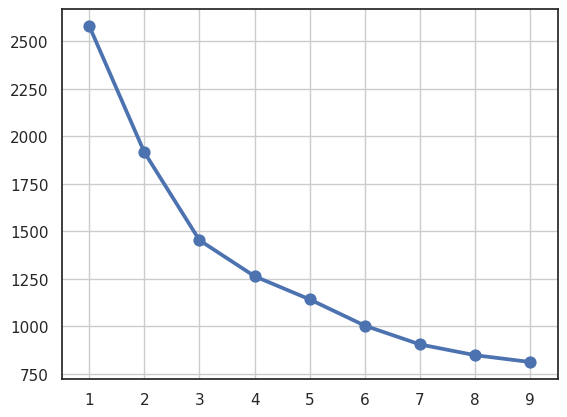

In [ ]:
# Assuming df_model is your dataframe
# Identify numerical and categorical columns
# Force specific columns to be treated as categorical if needed
categorical_cols = ['Program Studi', 'Bulan Wisuda', 'Status saat ini', 'Universitas S2', 'Universitas S3']
# List the names of your categorical columns here
numerical_cols = df_model.select_dtypes(include=np.number).columns
# If you have any numerical columns, this will detect them. Otherwise, it will be empty.

# Impute missing values for numerical features with the mean
# This step is still relevant if you have any numerical columns.
df_model[numerical_cols] = df_model[numerical_cols].fillna(df_model[numerical_cols].mean())

# Impute missing values for categorical features with the most frequent value
# This loop will iterate through your specified categorical columns.
for col in categorical_cols:
    # Check if the column exists in the DataFrame before accessing it
    if col in df_model.columns:
        df_model[col] = df_model[col].fillna(df_model[col].mode()[0])
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping imputation for this column.")  # Print a warning

# Now run your KPrototypes clustering
cost = {}
for k in range(1, 10):
    kproto = KPrototypes(n_clusters=k, random_state=75)
    kproto.fit_predict(df_model, categorical=[df_model.columns.get_loc(c) for c in categorical_cols])  # Use column indices for categorical features
    cost[k] = kproto.cost_

# Visualize Elbow Plot
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.grid()
plt.show()

Pilih k yang Optimal menggunakan elbow method

Dari output diatas, garis mengalami patahan yang membentuk elbow atau siku pada saat k = 4 5 6. Maka dengan menggunakan metode ini diperoleh k optimal pada saat berada di k = 4. Untuk menjadi pembanding, dilakukan uji yang lainnya.Berdasarkan output di atas didapat nilai k yang optimal

### Membuat model

In [ ]:
kproto = KPrototypes(n_clusters = 4, random_state = 75)
kproto = kproto.fit(df_model, categorical = [0,1,2,3])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

### Menggunakan Model

In [ ]:
# Menentukan segmen tiap pelanggan
clusters = kproto.predict(df_model, categorical = [0,1,2,3])
print('Segmen Alumni: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final = df.copy()
df_final['cluster'] = clusters
print(df_final.head(15))

Segmen Alumni: [3 3 3 3 3 3 0 1 3 3 3 3 0 3 3 0 0 0 0 0 0 1 0 3 3 3 3 3 1 3 1 3 1 2 3 3 3
 1 0 1 3 2 1 0 3 3 3 0 3 1 3 3 3 3 3 3 3 3 3 0 3 0 0 0 1 1 1 1 3 3 1 3 1 3
 1 1 0 3 3 0 3 3 3 1 3 1 3 0 3 3 2 3 0 2 1 0 1 1 3 0 3 3 1 1 1 0 0 1 3 3 2
 1 1 3 1 1 0 0 0 0 0 3 0 1 3 0 1 1 3 1 1 3 1 3 1 3 1 1 1 1 3 3 3 1 3 1 3 3
 3 1 3 3 1 3 3 3 1 3 3 3 3 3 1 3 3 3 1 3 1 3 3 1 3 1 1 3 1 3 3 3 3 3 1 3 1
 3 3 1 1 3 1 3 1 3 3 1 1 3 3 3 3 1 1 3 0 3 0 1 1 3 3 3 1 1 3 1 1 3 3 3 3 2
 3 3 3 3 3 3 1 1 3 1 2 1 2 1 1 3 1 1 2 1 2 1 3 1 3 3 3 3 3 3 3 1 1 3 1 1 1
 3 3 1 3 1 2 3 1 1 1 3 1 1 1 3 1 1 3 1 3 3 3 3 3 3 3 3 0 1 3 3 1 3 3 3 3 1
 3 3 1 3 3 3 1 1 1 3 3 1 1 3 1 3 1 1 3 1 1 1 3 2 1 1 3 1 3 3 2 1 3 3 1 1 3
 3 3 1 1 3 2 3 2 3 1 3 1 1 1 1 3 3 1 3 3 1 3 1 1 3 3 3 3 1 1 3 1 1 3 3 3 3
 3 3 3 3 3 3 3 3 1 3 1 3 2 1 3 1 1 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 1 1 3 2
 3 3 3 3 1 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]

             Timestamp        Program Studi  Tahun Masuk UIN Jakarta  \
0  2024-06-04 11:27:00  Prodi Agr

Menampilkan cluster tiap alumni

Setelah digabungkan data awal pelanggan dan cluster-nya, perlu untuk menampilkan dan mengobservasi hasilnya untuk membantu dalam memberi nama tiap cluster berdasarkan karakteristiknya.

In [ ]:
# Menampilkan data pelanggan berdasarkan clusternya
for i in range (0,5):
    print('\nAlumni Cluster: {}\n'.format(i))
    print(df_final[df_final['cluster'] == i])


Alumni Cluster: 0

              Timestamp        Program Studi  Tahun Masuk UIN Jakarta  \
6   2024-06-04 11:34:00          Prodi Kimia                     2010   
12  2024-06-26 14:36:00          Prodi Kimia                     2011   
15  2024-06-26 14:43:00          Prodi Kimia                     2008   
16  2024-06-26 14:45:00          Prodi Kimia                     2002   
17  2024-06-26 14:45:00          Prodi Kimia                     2002   
18  2024-06-26 14:45:00          Prodi Kimia                     2011   
19  2024-06-26 14:47:00          Prodi Kimia                     2013   
20  2024-06-26 14:49:00          Prodi Kimia                     2011   
22  2024-06-26 15:01:00          Prodi Kimia                     2009   
38  2024-06-26 17:43:00          Prodi Kimia                     2008   
43  2024-06-26 18:31:00     Prodi Matematika                     2009   
47  2024-06-26 18:58:00     Prodi Matematika                     2011   
59  2024-06-26 20:03:00     Pro

#### Visualisasi Hasil Clustering Box-Plot

Lalu kami juga menggunakan Vusualisasi hasil clustering untuk mempermudah penamaan di tiap-tiap cluster.

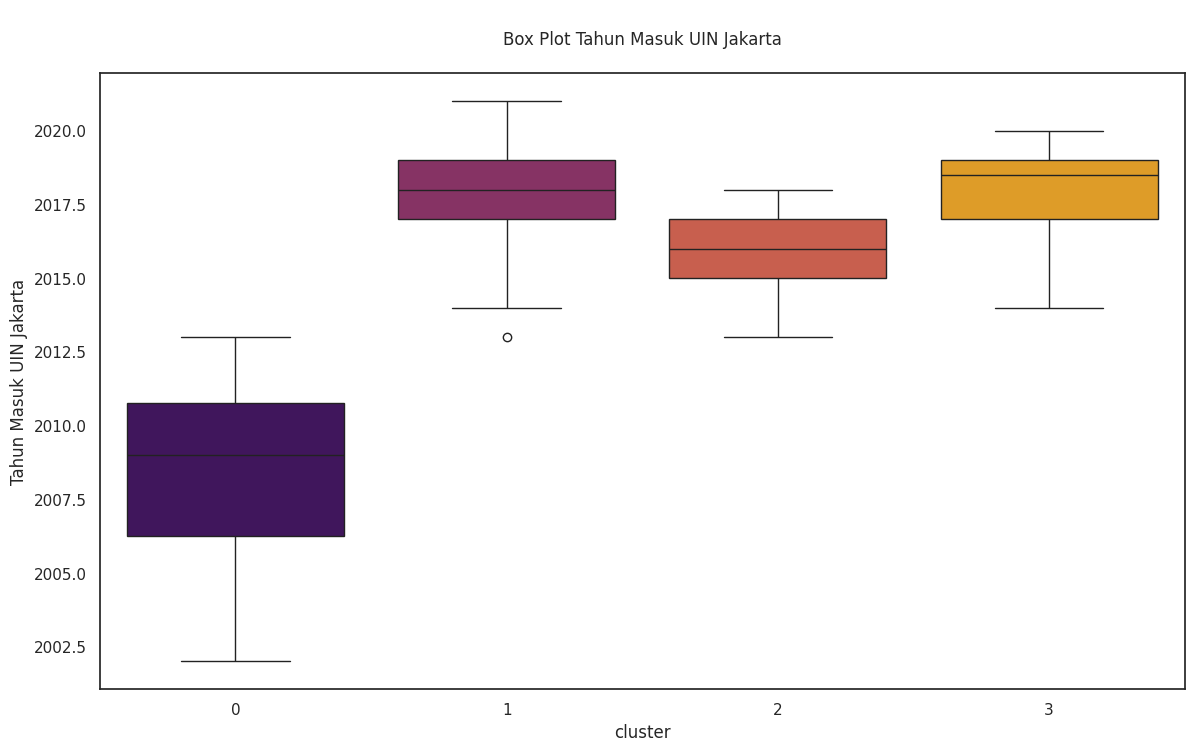

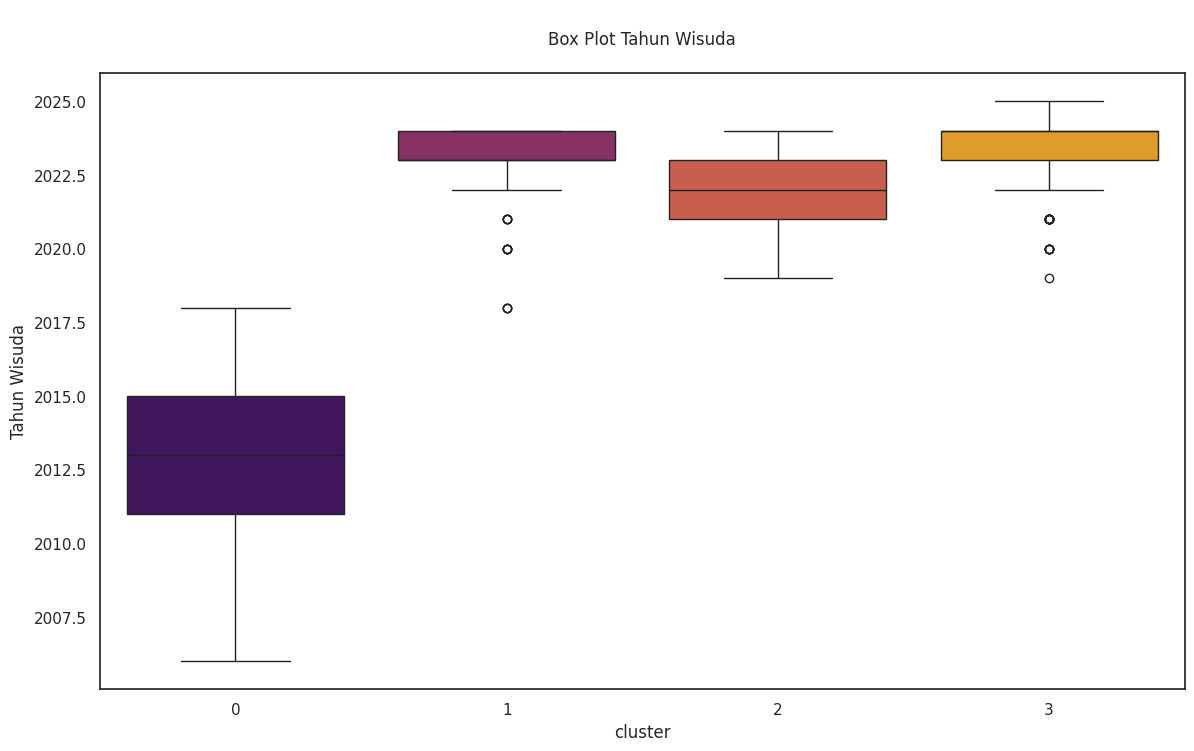

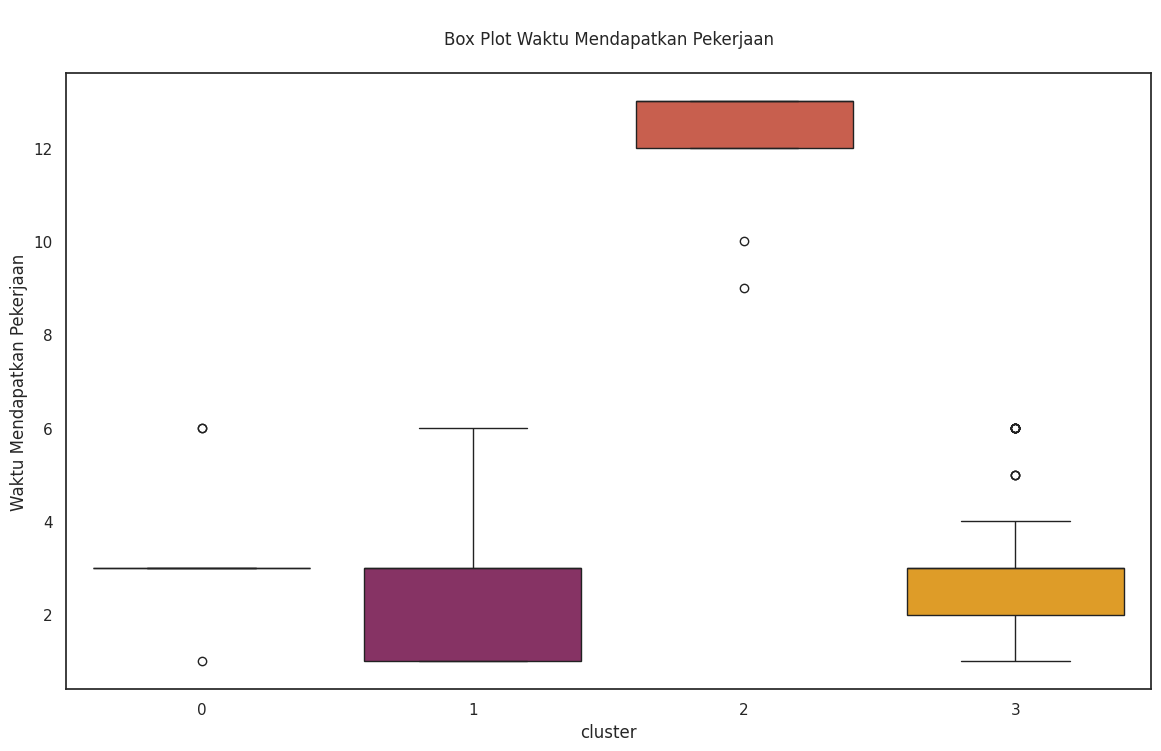

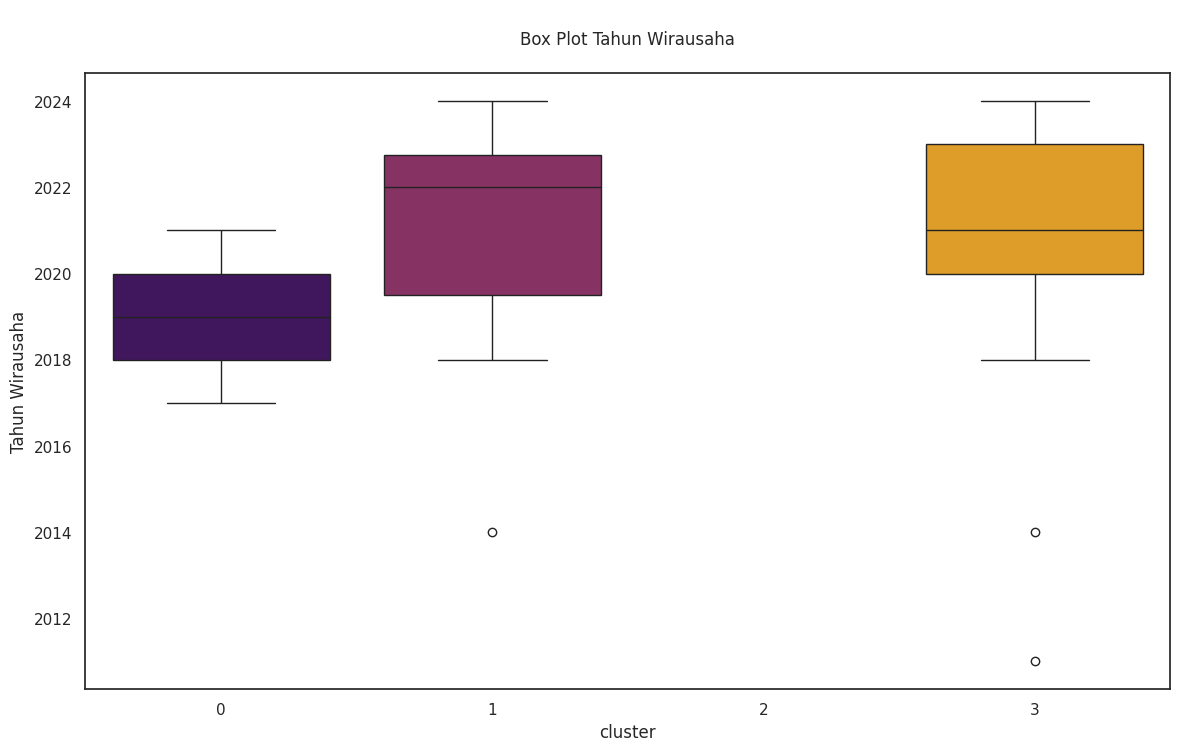

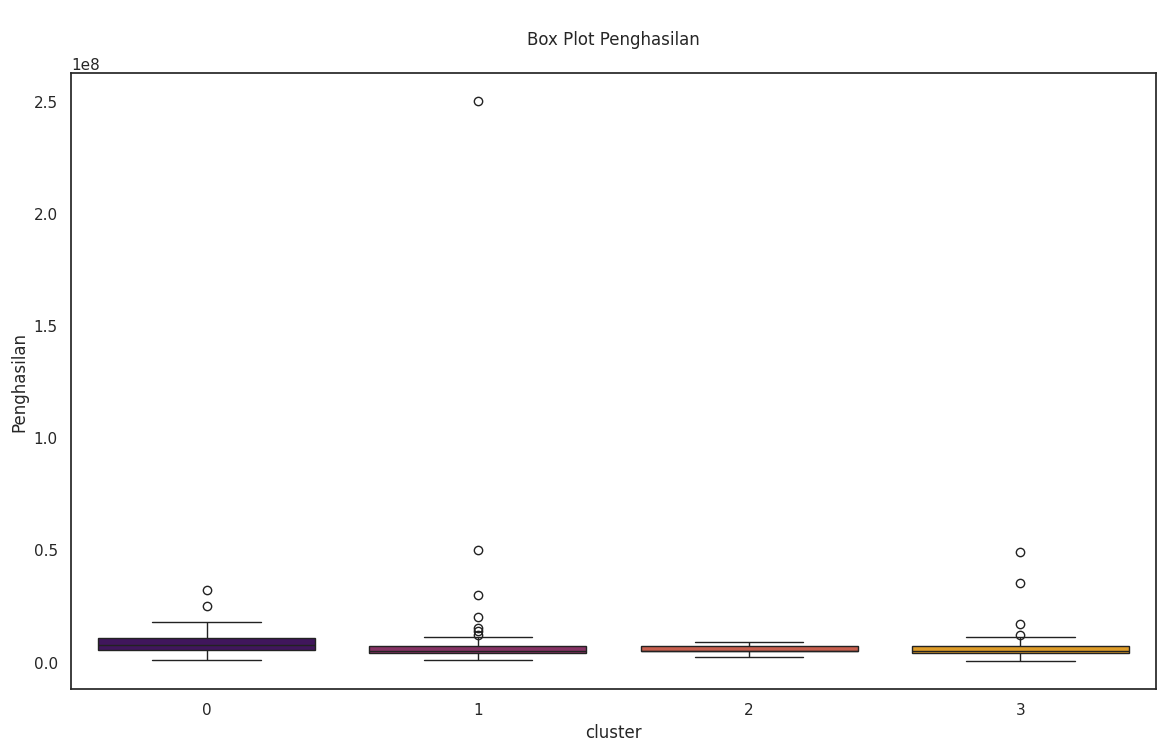

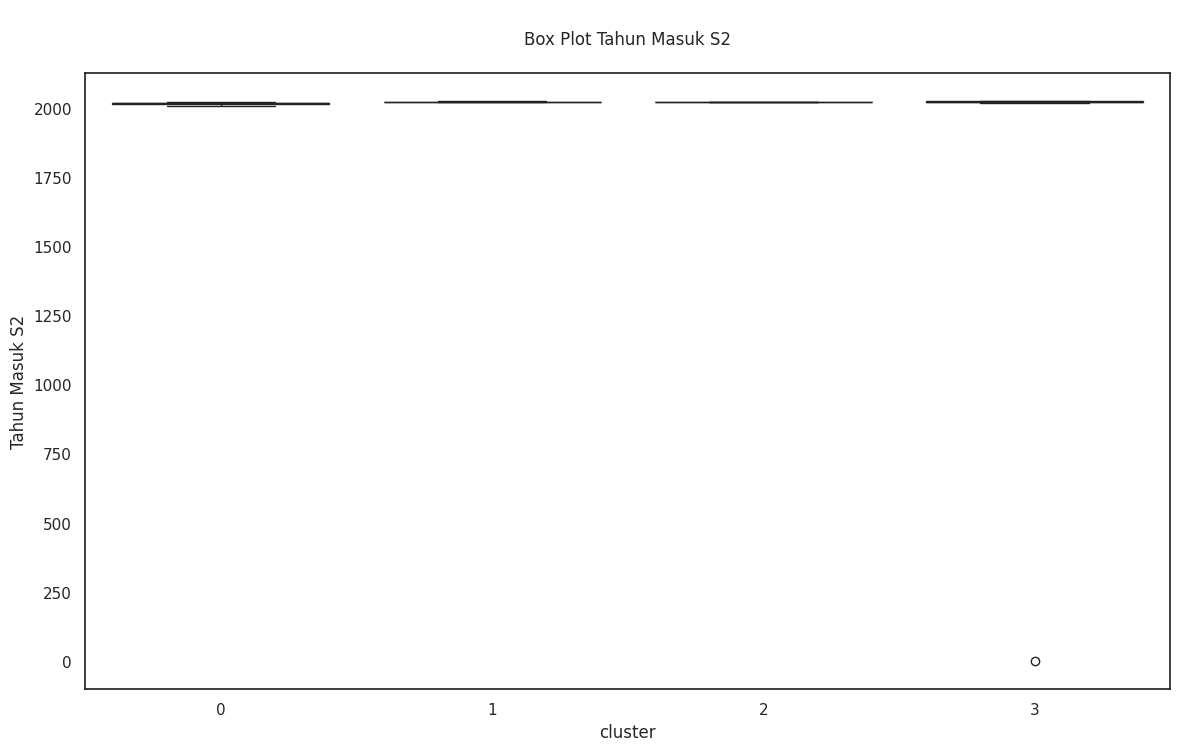

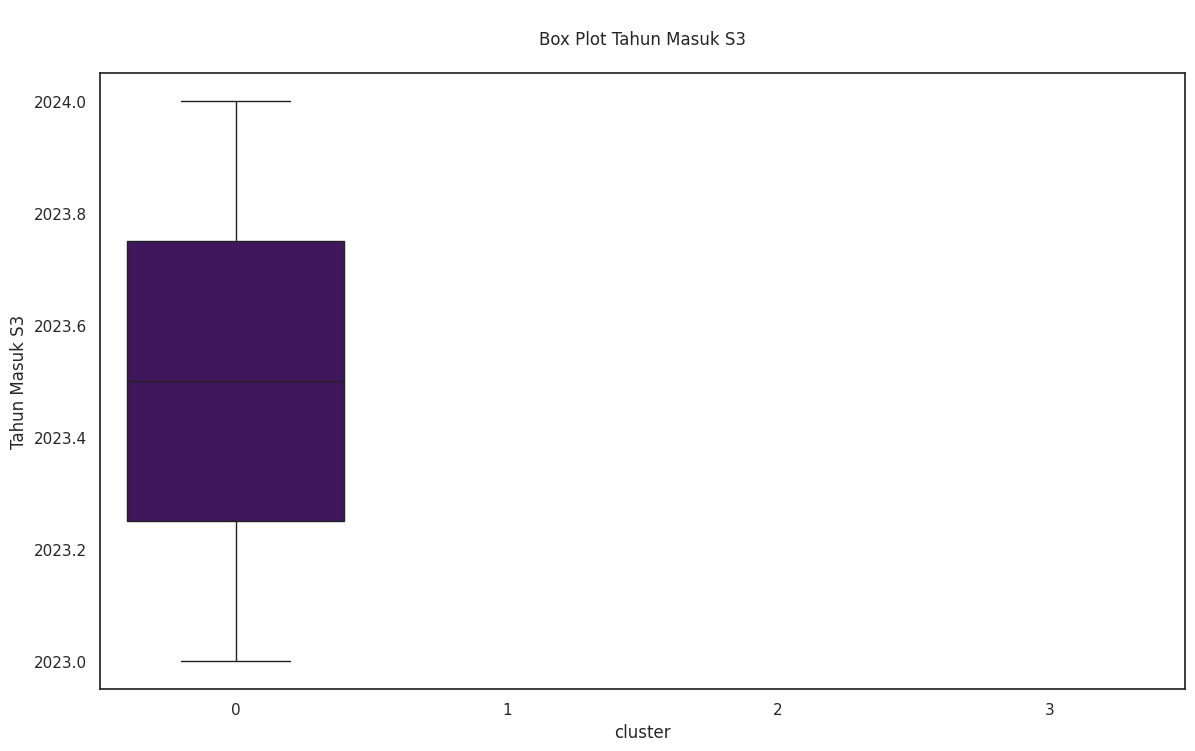

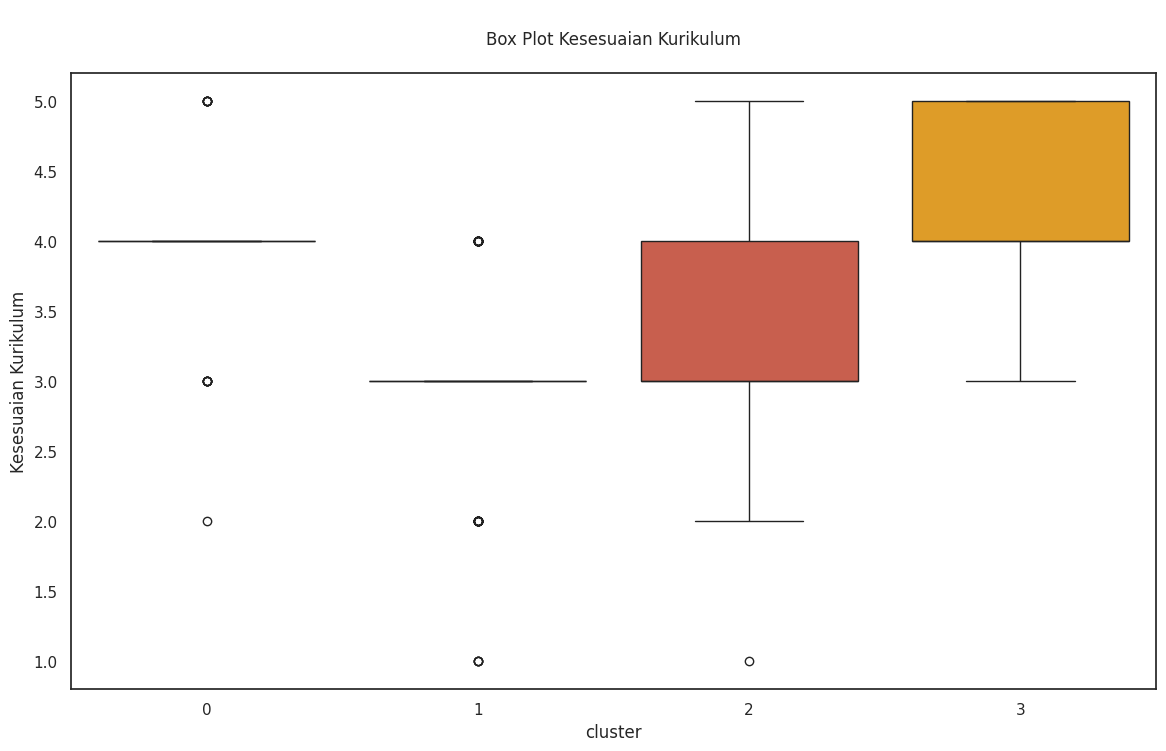

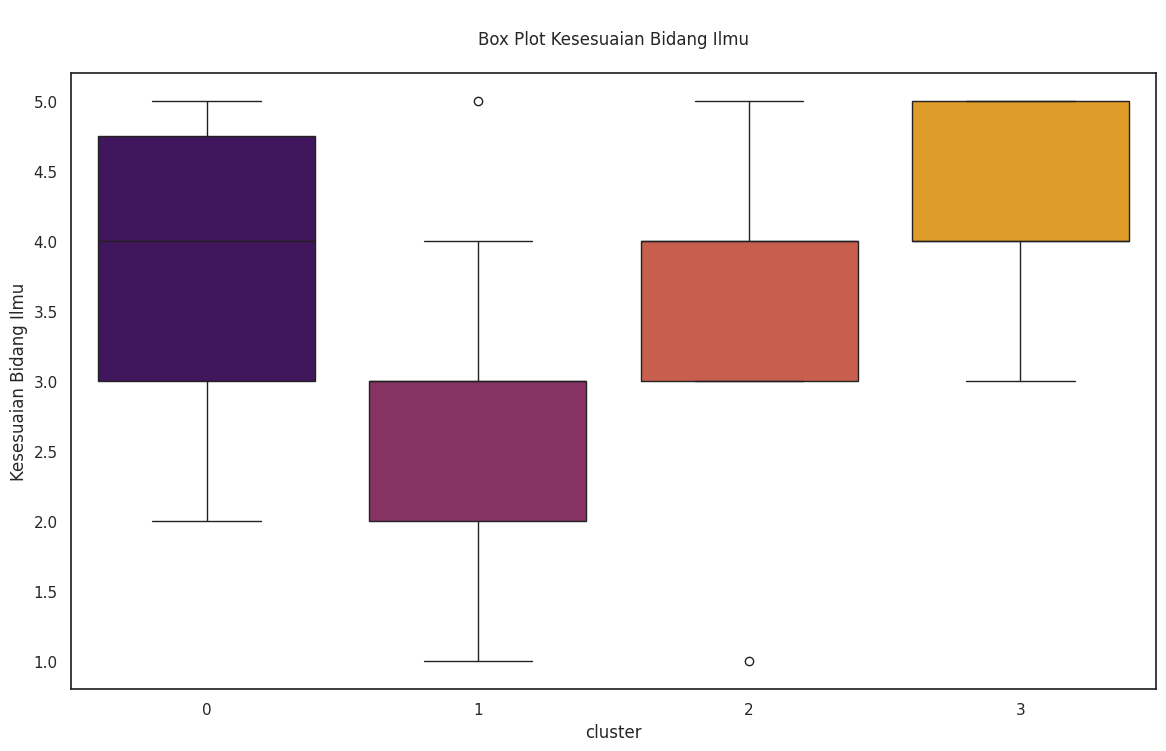

In [ ]:
for i in numerik:
    plt.figure(figsize=(14,8))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final, palette='inferno')
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

#### Visualisasi Hasil Clustering Count Plot

Lalu kami juga menggunakan Vusualisasi hasil clustering untuk mempermudah penamaan di tiap-tiap cluster.

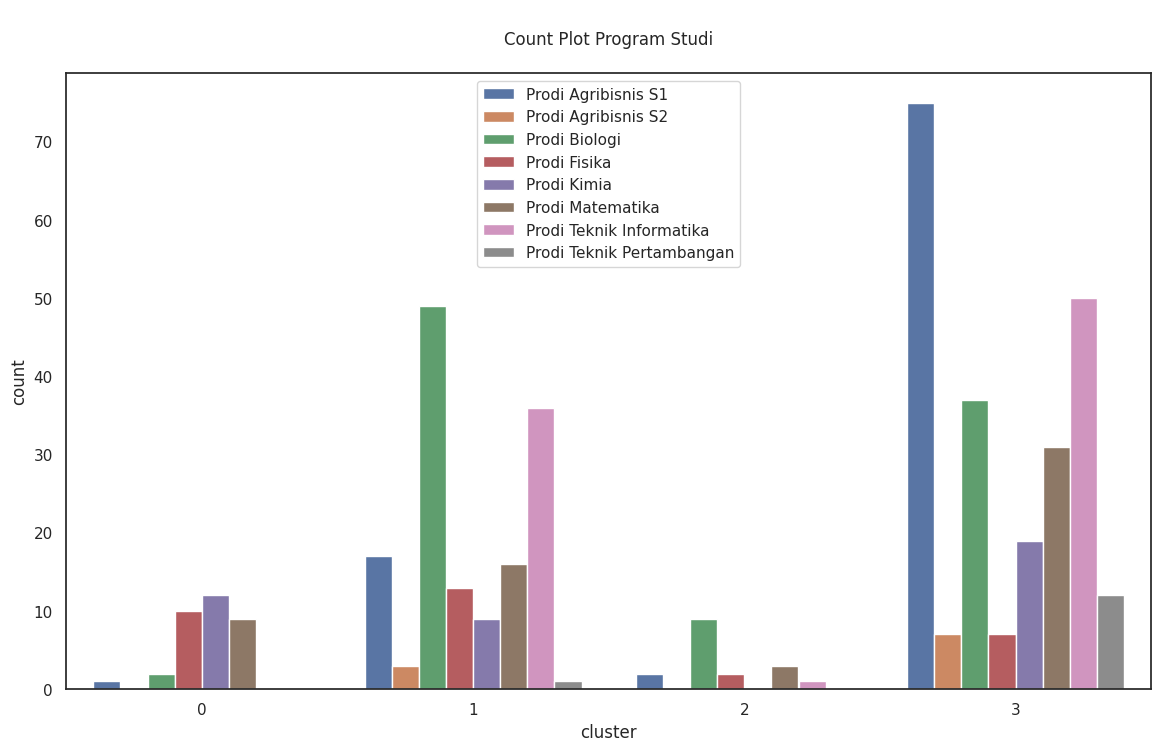

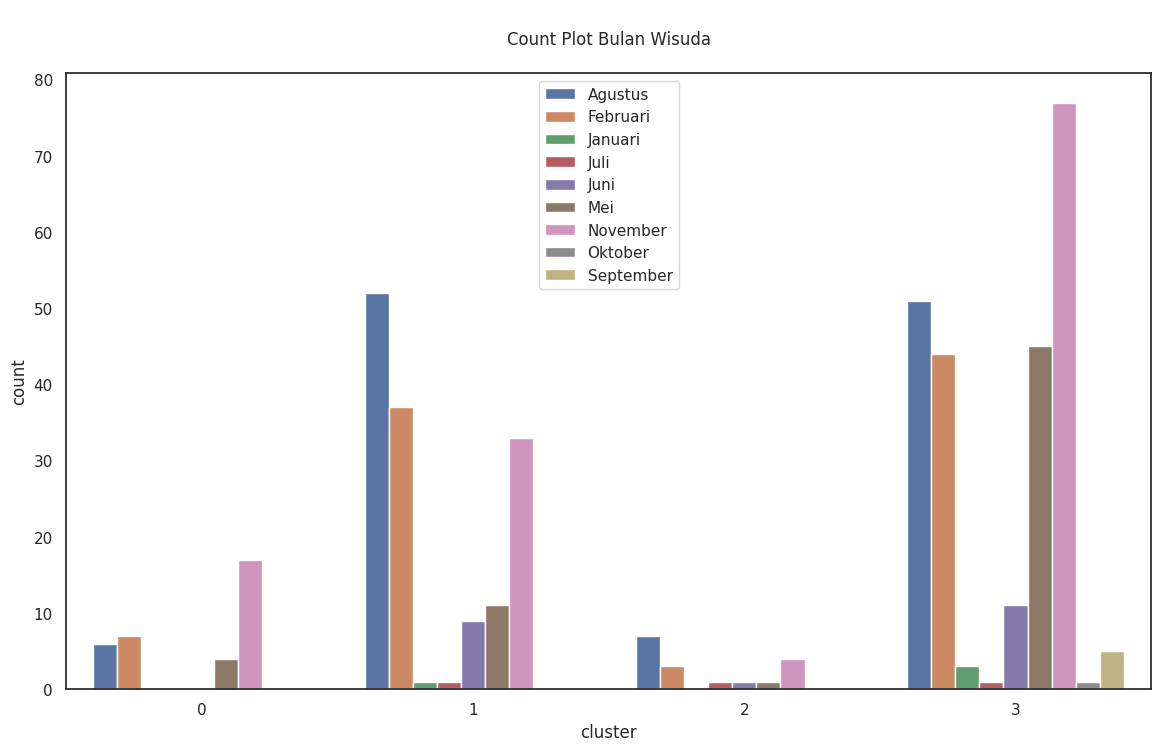

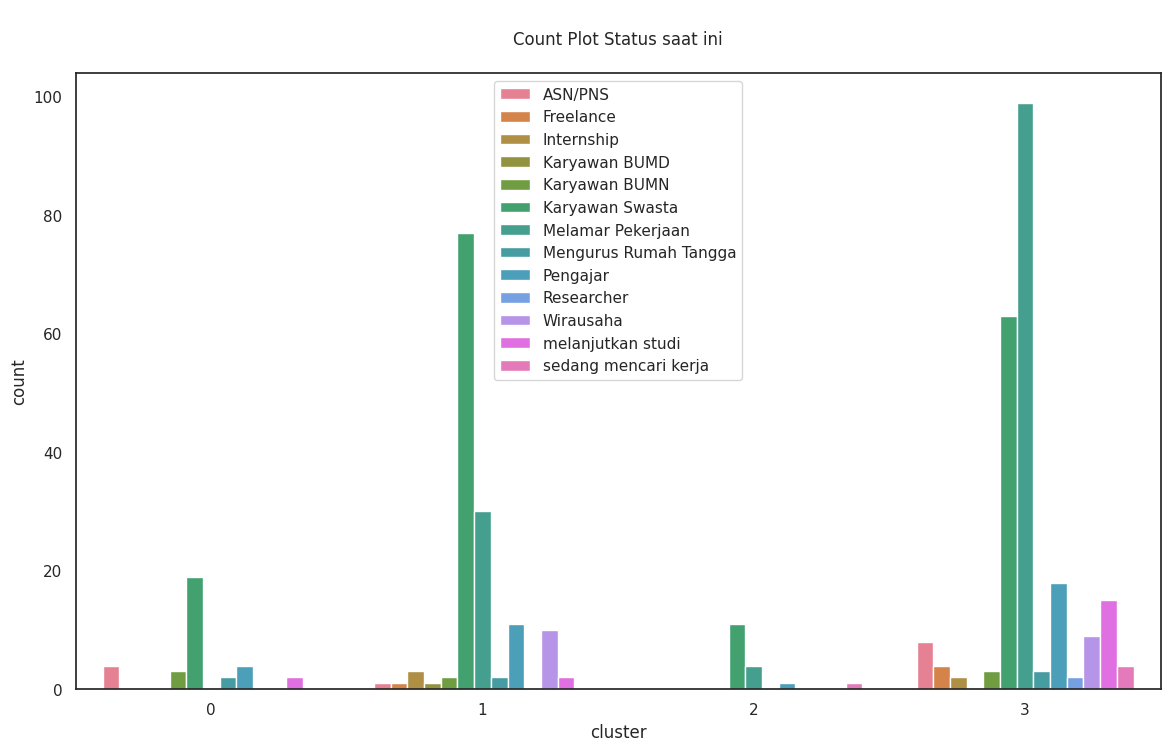

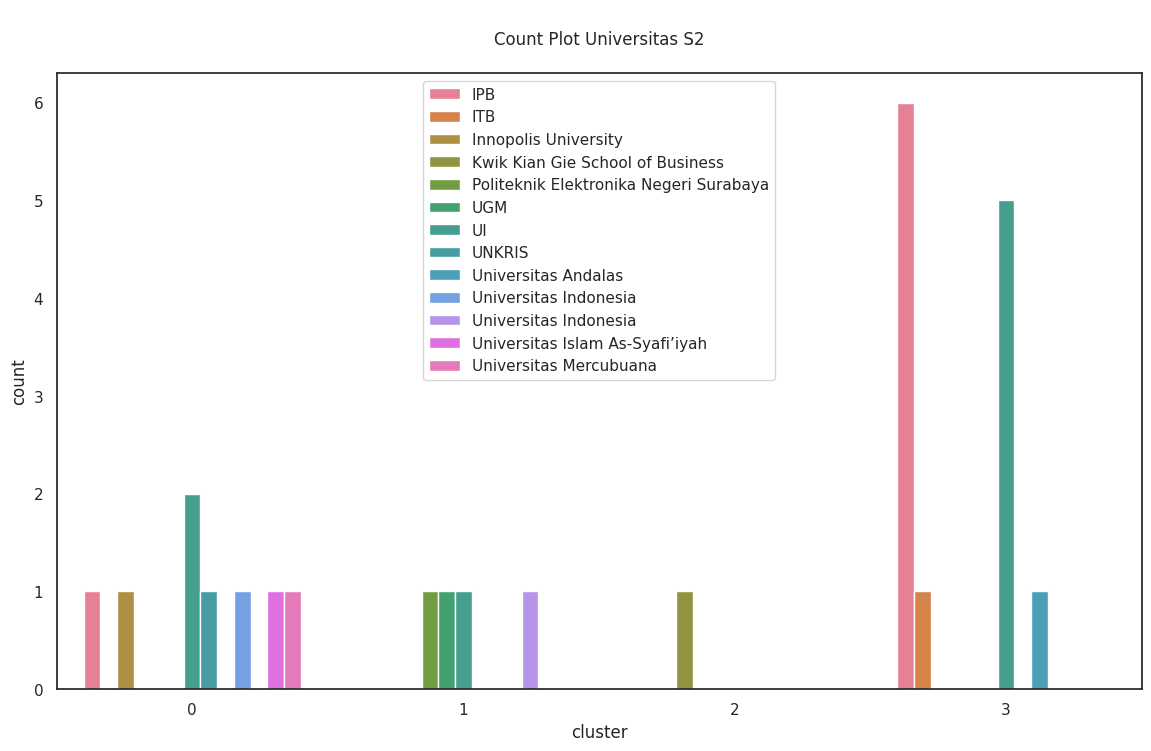

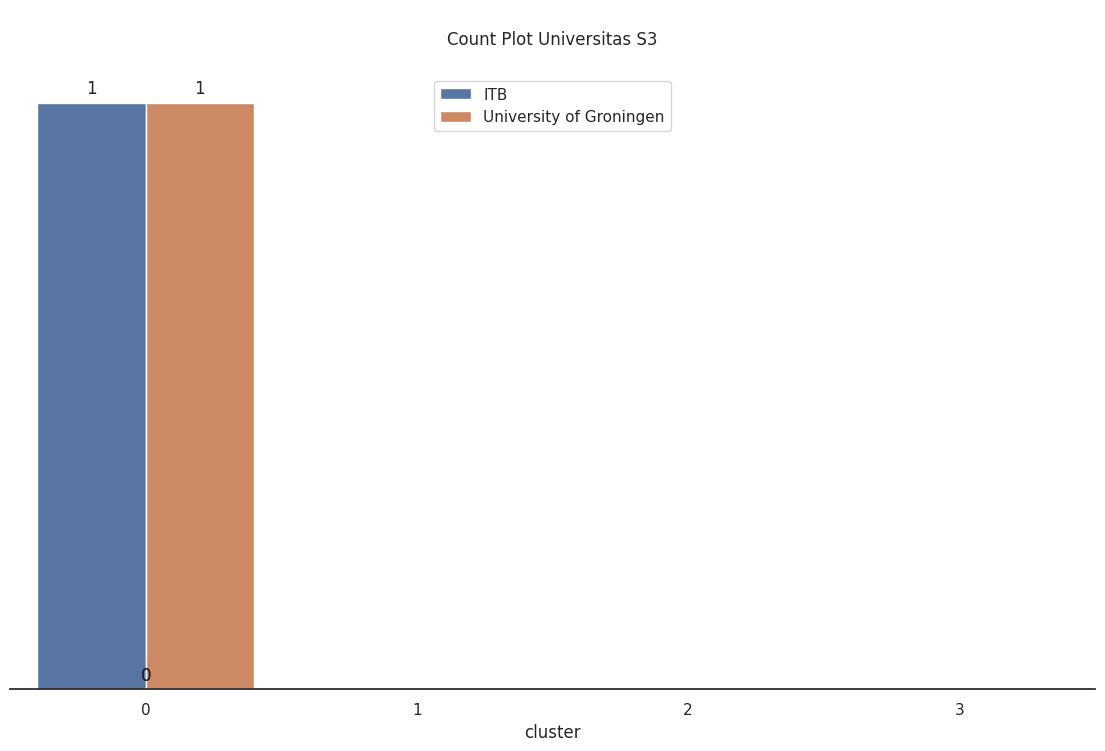

In [ ]:
for i in kategorik:
    plt.figure(figsize=(14,8))
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')

sns.despine(right = True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

### Menamakan Cluster

In [ ]:
# Mapping nama kolom
df_final['Segmen'] = df_final['cluster'].map({
0: 'Nama Cluster 1',
1: 'Nama Cluster 2',
2: 'Nama Cluster 3',
3: 'Nama Cluster 4',
})

print(df_final.info())
print(df_final.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Timestamp                    433 non-null    datetime64[ns]
 1   Program Studi                433 non-null    category      
 2   Tahun Masuk UIN Jakarta      433 non-null    Int64         
 3   Tahun Wisuda                 433 non-null    Int64         
 4   Bulan Wisuda                 433 non-null    category      
 5   Status saat ini              421 non-null    category      
 6   Waktu Mendapatkan Pekerjaan  273 non-null    Int64         
 7   Perusahaan                   221 non-null    object        
 8   Posisi                       224 non-null    object        
 9   Tahun Wirausaha              30 non-null     Int64         
 10  Bidang wirausaha             32 non-null     object        
 11  Penghasilan                  204 non-null    

# Kesimpulan Akhir

*  Cluster 0 : "kesimpulan cluster 0"

*  Cluster 1 : "kesimpulan cluster 1"

*  Cluster 2 : "kesimpulan cluster 2"

*  Cluster 3 : "kesimpulan cluster 3"